In [4]:
from functions import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [23]:
team_data = pd.read_csv('./data/Tournament Team Data.csv')
teams = team_data['TEAM'].to_numpy()
team_data.drop(['TEAM', 'TEAM.1'], axis=1, inplace=True)

team_columns= team_data.columns
team_data_arr = team_data.to_numpy()


In [27]:
team_data_arr = standardize_data(team_data_arr)

In [28]:
trials = 500
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),team_data_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), team_data_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), team_data_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), team_data_arr, trials),
              simulate(IterativeImputer(random_state=0), team_data_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

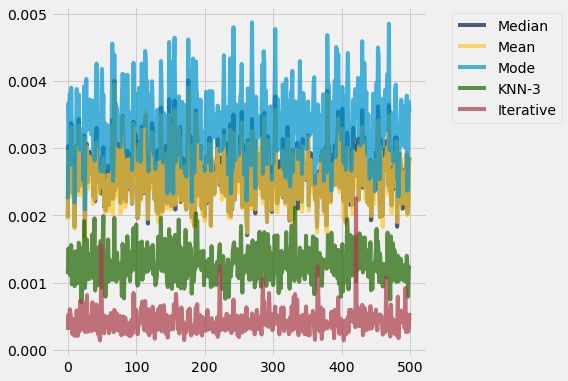

In [29]:
results_table = Table.from_df(results)
results_table.plot()

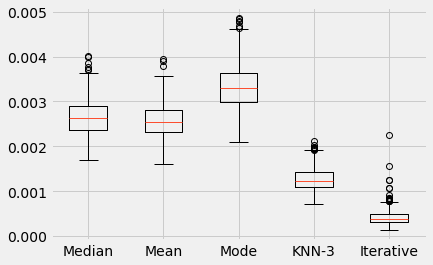

In [30]:
results_table.boxplot()

c:\Anaconda\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


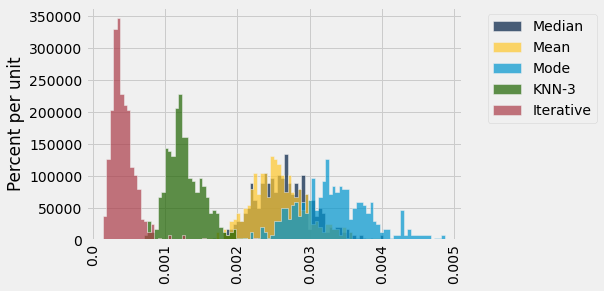

In [31]:
results_table.hist(bins=100)

In [33]:
trials = 250
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),team_data_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), team_data_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), team_data_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), team_data_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), team_data_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

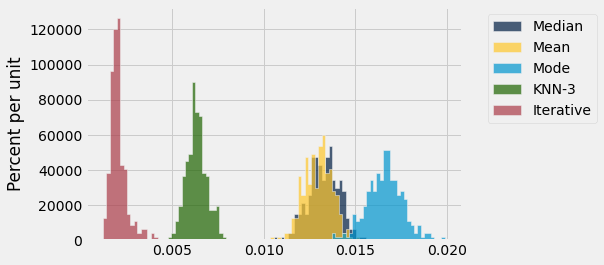

In [34]:
results_table_2 = Table.from_df(results_2)
results_table_2.hist(bins=100)

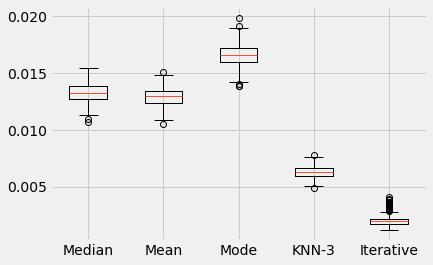

In [35]:
results_table_2.boxplot()

In [43]:
trials = 100
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),team_data_arr, trials,remove_random_features_row_independent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), team_data_arr, trials, remove_random_features_row_independent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), team_data_arr, trials, remove_random_features_row_independent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), team_data_arr, trials, remove_random_features_row_independent, .10),
              simulate(IterativeImputer(random_state=0), team_data_arr, trials, remove_random_features_row_independent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

In [ ]:
results_table_3 = Table.from_df(results_3)
results_table_3.hist(bins=100)

In [ ]:
results_table_3.boxplot()

In [ ]:
trials=250
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), team_data_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), team_data_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), team_data_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), team_data_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), team_data_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), team_data_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']

In [ ]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

In [ ]:
k_table.boxplot()

In [ ]:
k_table.hist(bins=10)

In [ ]:
k_table.mean()

In [ ]:
k_table.boxplot()